# Project - Crop disease Identification DL model


## Import Libraries

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers


## Import Data

In [103]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Hp\Downloads\Practice Data frames\Database\Deep Learning Project Crop disease\PlantVillage\Capstone\*\*',
    shuffle = True,
    image_size=(256,256)
)

Found 2152 files belonging to 3 classes.


In [104]:
for i, j in dataset:
    print(i.numpy().shape)
    print(j.numpy())

(32, 256, 256, 3)
[1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 2 0 2 1 0 0 1 1 1 0 0]
(32, 256, 256, 3)
[0 1 1 0 1 0 0 0 2 0 1 0 0 0 1 0 1 1 0 0 0 0 2 1 1 1 0 1 0 0 1 0]
(32, 256, 256, 3)
[1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 2 0 0 1 0 1]
(32, 256, 256, 3)
[0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 2 0 0 0 1 0 2 1]
(32, 256, 256, 3)
[0 0 1 1 1 1 0 0 0 0 1 2 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0]
(32, 256, 256, 3)
[1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0]
(32, 256, 256, 3)
[0 0 0 0 0 1 2 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1]
(32, 256, 256, 3)
[1 1 1 1 2 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1]
(32, 256, 256, 3)
[2 1 1 0 1 1 0 1 1 0 1 0 0 0 0 2 1 1 1 1 0 1 0 2 1 0 1 1 0 0 0 0]
(32, 256, 256, 3)
[1 1 1 0 0 1 1 0 2 1 1 0 0 0 0 0 0 1 0 1 1 0 2 0 1 0 1 2 1 0 0 0]
(32, 256, 256, 3)
[1 1 0 0 1 1 1 0 0 0 0 2 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1]
(32, 256, 256, 3)
[0 1 1 1 0 0 0 1 0 1 1 2 0 1 1 0 1 1 0 1 1 1 0 1 2 1 1 1 1

In [105]:
len(dataset)

68


- Total 68 batch each batch containing 32 images of size 256x256 with 3 layers of RGB


## Visualizing Data

In [29]:
import matplotlib.pyplot as plt

In [92]:
classes = dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

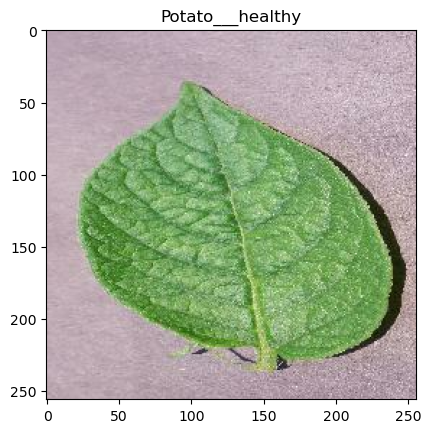

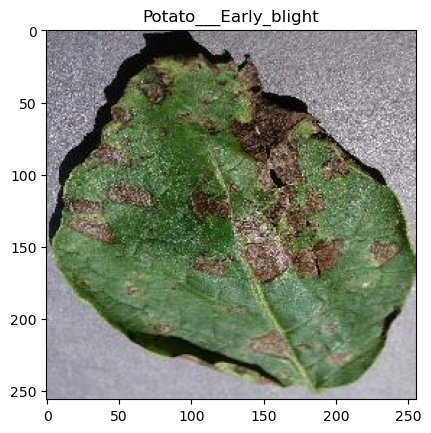

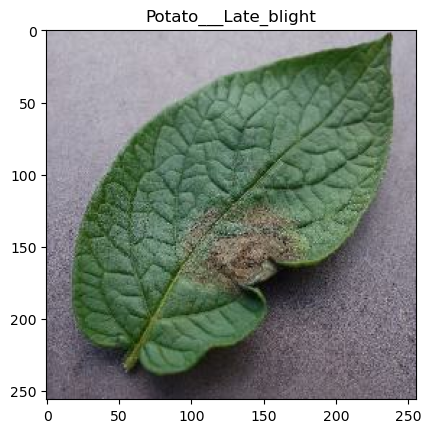

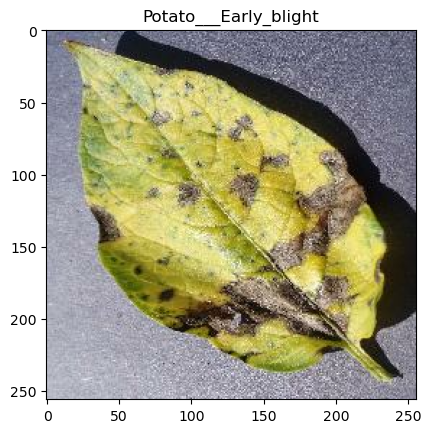

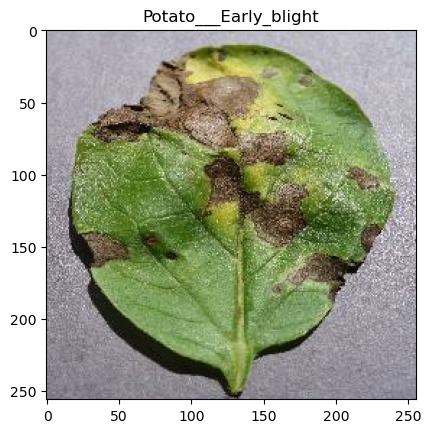

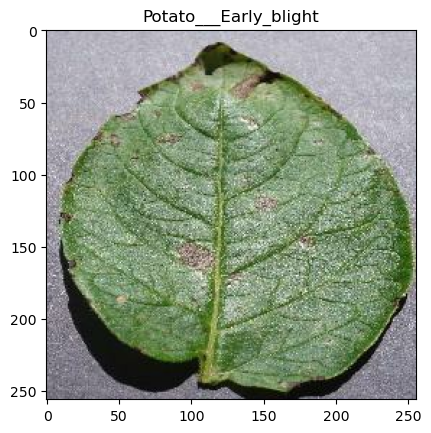

In [96]:
for i,j in dataset.take(6):
    plt.imshow(i.numpy()[0].astype("uint8")) #uint8 to convert float to integer
    plt.title(classes[j[0].numpy()])
    plt.show()

## Splitting data in 3 part - Training, Validation and testing

In [113]:
train = dataset.take(int(len(dataset)*0.8))
len(train)

54

In [115]:
temp = dataset.skip(int(len(dataset)*0.8))
len(temp)

14

In [118]:
val = temp.take(int(len(temp)*0.5))
len(test)

7

In [119]:
test = temp.skip(int(len(temp)*0.5))
len(test)

7

In [126]:
# Creating a Def function to split data

def split_data(ds, train_split = 0.8, test_split = 0.2, shuffle = True, shuffle_size = 1000):
    if shuffle:
        ds = ds.shuffle(shuffle_size)
    train_set = ds.take(int(len(ds)*train_split))
    temp = ds.skip(int(len(ds)*test_split))
    val_set = temp.take(int(len(temp)*0.5))
    test_set = temp.skip(int(len(temp)*0.5))
    
    return train_set, val_set, test_set

In [127]:
train, val, test = split_data(dataset)

In [128]:
print(f'''

Length of original dataset = {len(dataset)}
Length of train dataset = {len(train)}
Length of validation dataset = {len(val)}
Length of test dataset = {len(test)}

'''
)



Length of original dataset = 68
Length of train dataset = 54
Length of validation dataset = 27
Length of test dataset = 28




- Taking 80 percent of data set for training. 
- 50 percent of remaining test dataset will be used for validating epochs.
- Other 50 percent of test data will be used for calculating the performance of model

## Model optimization

In [132]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

- Cache memorizes and eliminates the preprocessing after 1st epoch thus increasing effeciency and reducing training time.
- Prefetch loads or keeps the next batch ready while training is previous batch.

### Scaling

In [134]:
scale_resize = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

### Data Augmentation

In [135]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## Model Building and training

In [141]:
# Builing model and its layers 

model = models.Sequential([
    scale_resize,
    data_aug,
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 256, 256, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])

model.build(input_shape=(32, 256, 256, 3))

In [142]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_15 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (32, 62, 62, 32)          0         
 ng2D)                                                

In [145]:
# Compiling

model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [146]:
# Training Model on the train dataset

record = model.fit(
    train, 
    epochs=50,
    verbose=1,
    batch_size = 32,
    validation_data=val
)

Epoch 1/50


54/54 [==============================] - 49s 830ms/step - loss: 0.8850 - accuracy: 0.5440 - val_loss: 0.7825 - val_accuracy: 0.5995
Epoch 2/50
54/54 [==============================] - 39s 718ms/step - loss: 0.5422 - accuracy: 0.7923 - val_loss: 0.4248 - val_accuracy: 0.8438
Epoch 3/50
54/54 [==============================] - 39s 733ms/step - loss: 0.3907 - accuracy: 0.8504 - val_loss: 0.3554 - val_accuracy: 0.8704
Epoch 4/50
54/54 [==============================] - 39s 723ms/step - loss: 0.3382 - accuracy: 0.8597 - val_loss: 0.2931 - val_accuracy: 0.8831
Epoch 5/50
54/54 [==============================] - 39s 727ms/step - loss: 0.3389 - accuracy: 0.8685 - val_loss: 0.3949 - val_accuracy: 0.8727
Epoch 6/50
54/54 [==============================] - 40s 738ms/step - loss: 0.3169 - accuracy: 0.8744 - val_loss: 0.2657 - val_accuracy: 0.8900
Epoch 7/50
54/54 [==============================] - 42s 787ms/step - loss: 0.2344 - accuracy: 0.9085 - val_loss: 0.2520 - val_accuracy: 0.91

In [147]:
# Test (unseen data) accuracy

test_accuracy = model.evaluate(test)

28/28 [==============================] - 6s 152ms/step - loss: 0.0628 - accuracy: 0.9794


In [154]:
# Performace Evaluation

import pandas as pd
import seaborn as sns

record_df = pd.DataFrame(record.history)
record_df

,loss,accuracy,val_loss,val_accuracy
0,0.884974,0.544014,0.782532,0.599537
1,0.542237,0.792253,0.424779,0.843750
2,0.390692,0.850352,0.355384,0.870370
3,0.338223,0.859742,0.293098,0.883102
4,0.338942,0.868545,0.394892,0.872685
5,0.316949,0.874413,0.265723,0.890046
6,0.234422,0.908451,0.252008,0.916667
7,0.188769,0.930164,0.109843,0.967593
8,0.125616,0.955399,0.192029,0.921296
9,0.137861,0.954225,0.222868,0.912037


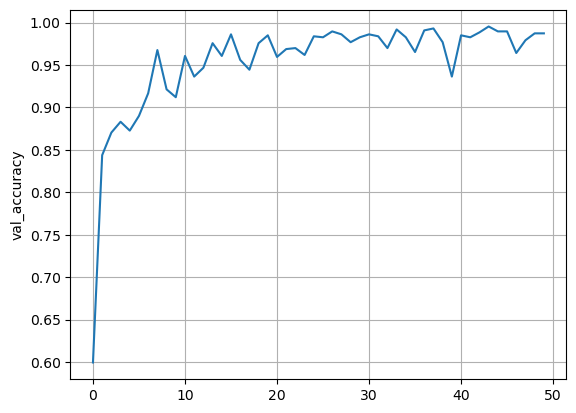

In [160]:
sns.lineplot(x = record_df.index, y = record_df['val_accuracy'])
plt.grid()